## Friction Coefficient of a F1 tire

In [42]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [43]:
## Read the data from data.json
with open('data.json', 'r') as f:
    data = json.load(f)

print("Data is stored in the following format:")
print("Racers:",data.keys())
print("Lap:",data['VER'].keys())
print("Lap information:",data['VER']["49"].keys())

with open("corners.json", 'r') as f:
    corners = json.load(f)

print("Corners:", corners.keys())
print("Corner 15 information:", corners["CornerNumber"][14], corners["X"][14], corners["Y"][14],corners["Angle"][14],corners["Distance"][14])
print("Corner 16 information:", corners["CornerNumber"][15], corners["X"][15], corners["Y"][15],corners["Angle"][15],corners["Distance"][15])


Data is stored in the following format:
Racers: dict_keys(['VER', 'HUL', 'PIA', 'NOR', 'SAI', 'OCO', 'ALO', 'LEC', 'BEA', 'HAM', 'ALB', 'STR', 'RUS', 'GAS'])
Lap: dict_keys(['49', '50', '51', '52'])
Lap information: dict_keys(['time', 'speed', 'distance'])
Corners: dict_keys(['CornerNumber', 'X', 'Y', 'Angle', 'Distance', 'Rotation'])
Corner 15 information: 15 2398.9521484375 -4099.2412109375 -81.47941394640335 4984.092735435512
Corner 16 information: 16 -620.4287109375 -993.7661743164062 61.329159623640706 5431.602779987257


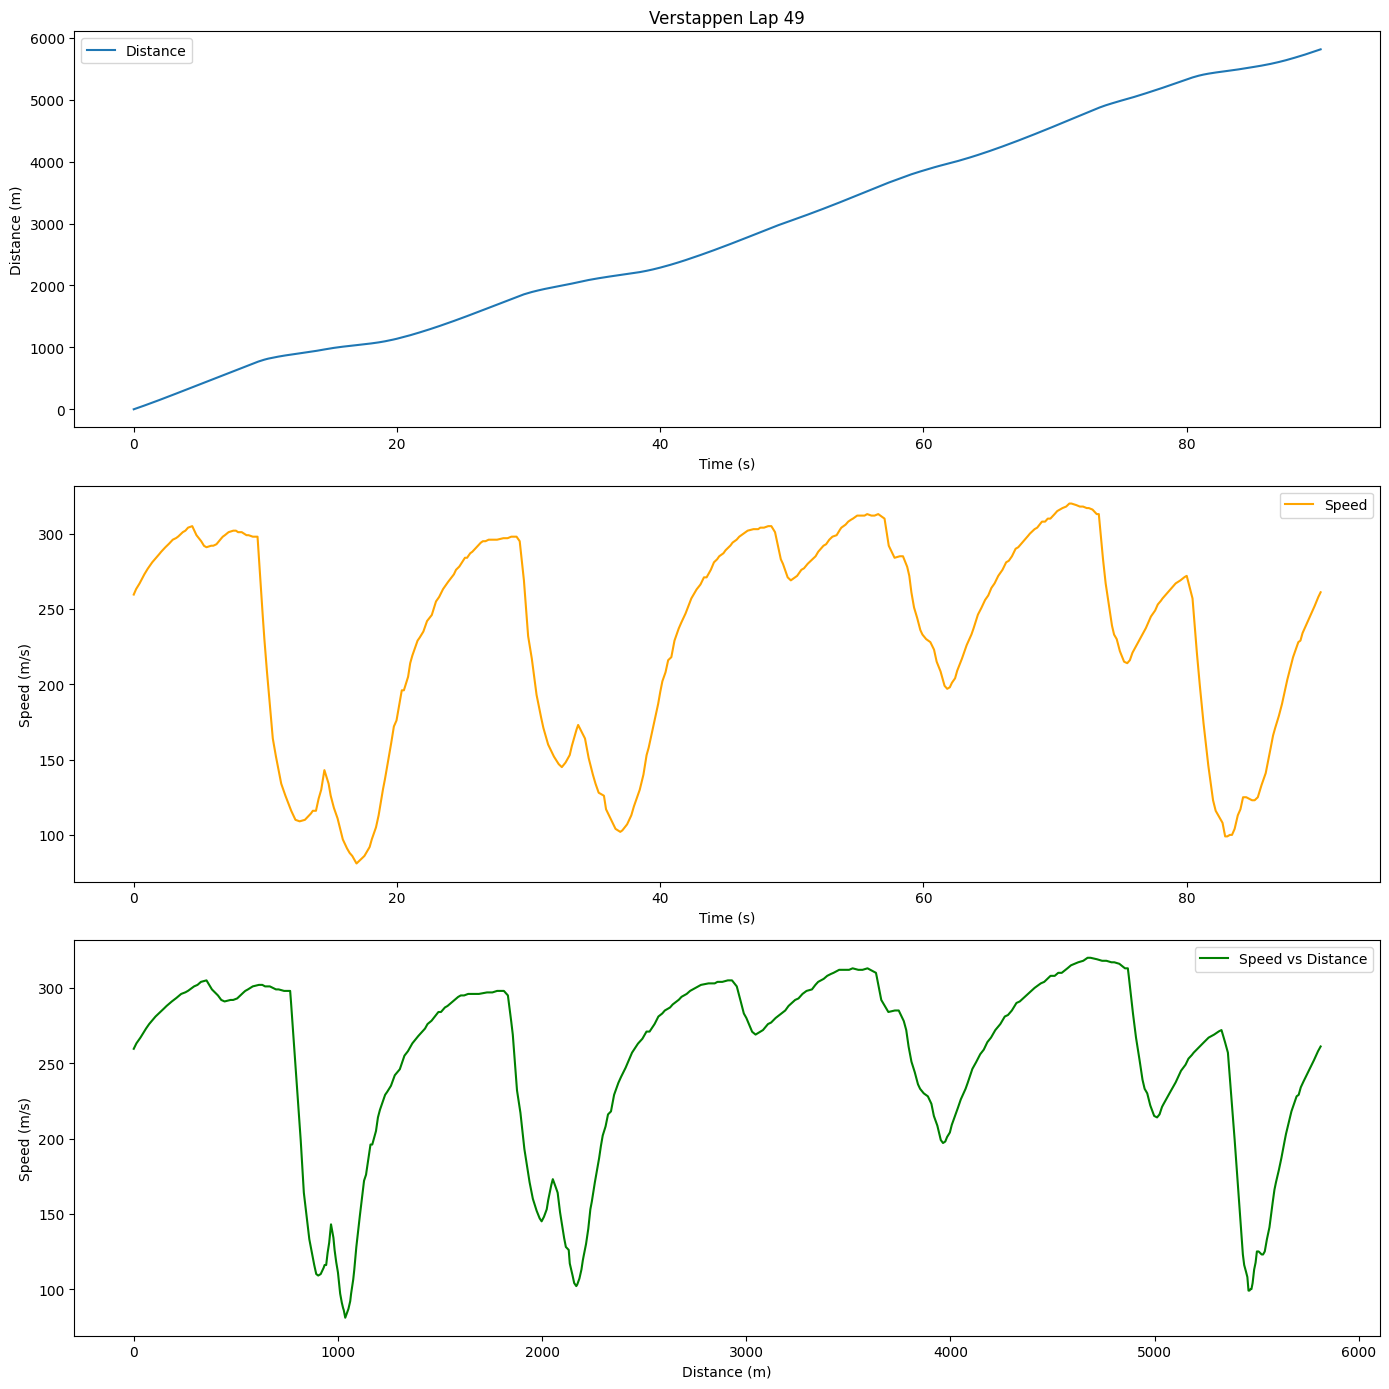

In [44]:
plt.figure(figsize=(14, 14))
plt.subplot(3, 1, 1)
plt.title("Verstappen Lap 49")
plt.plot(data['VER']["49"]['time'], data['VER']["49"]["distance"], label='Distance')
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")
plt.legend()

plt.subplot(3, 1, 2)
# plt.title("Verstappen Lap 49 Speed")
plt.plot(data['VER']["49"]['time'], data['VER']["49"]["speed"], label='Speed', color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(data["VER"]["49"]['distance'], data["VER"]["49"]["speed"], label='Speed vs Distance', color='green')
plt.xlabel("Distance (m)")
plt.ylabel("Speed (m/s)")
plt.legend()
plt.tight_layout()
plt.show()

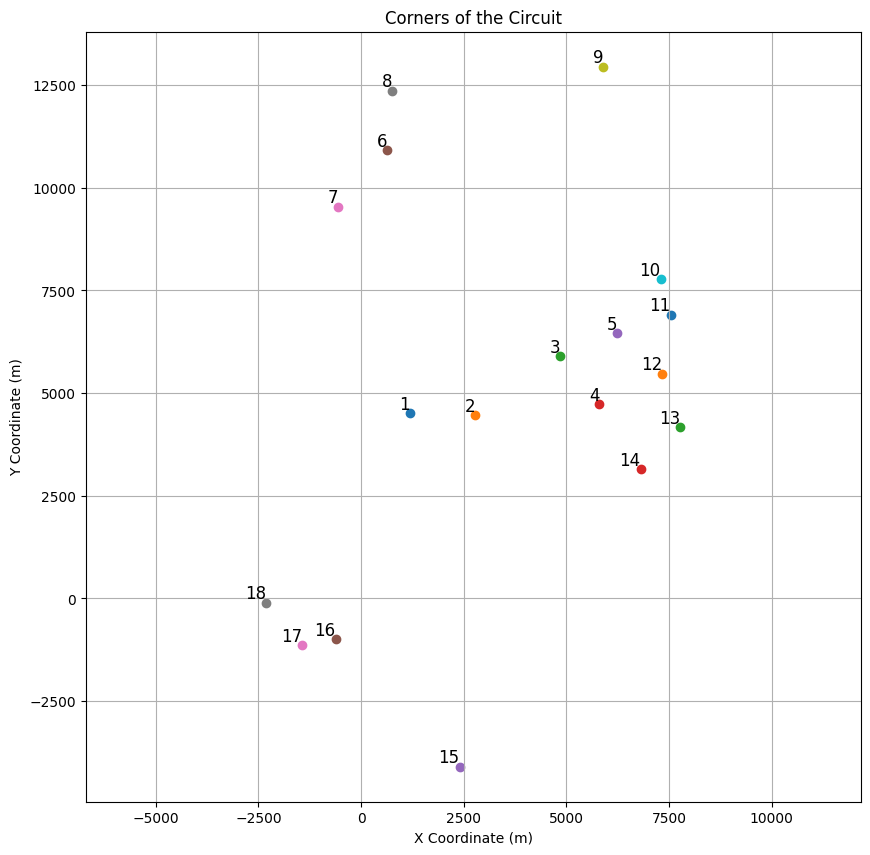

In [45]:
## Scatter plot the corner X Y coordinates
plt.figure(figsize=(10, 10))
for i in range(len(corners["CornerNumber"])):
    plt.scatter(corners["X"][i], corners["Y"][i])
    plt.annotate(corners["CornerNumber"][i], (corners["X"][i], corners["Y"][i]), fontsize=12, ha='right', va='bottom')

plt.title("Corners of the Circuit")
plt.xlabel("X Coordinate (m)")
plt.ylabel("Y Coordinate (m)")
plt.grid()
plt.axis('equal')
plt.show()

In [46]:
x = np.array(corners["X"])
y = np.array(corners["Y"])
angles = np.array(corners["Angle"])
distances = np.array(corners["Distance"])



{49: {'tel': {'time': [0.0, 0.165, 0.18, 0.34, 0.445, 0.62, 0.759, 0.805, 1.005, 1.059, 1.139, 1.359, 1.405, 1.605, 1.639, 1.805, 1.939, 2.085, 2.3, 2.32, 2.405, 2.645, 2.68, 2.965, 3.08, 3.205, 3.22, 3.365, 3.38, 3.64, 3.725, 3.8, 3.925, 4.125, 4.445, 4.619, 4.72, 4.765, 4.899, 5.099, 5.125, 5.325, 5.339, 5.526, 5.56, 5.739, 5.885, 6.045, 6.1, 6.285, 6.36, 6.565, 6.66, 6.765, 6.9, 6.925, 7.139, 7.205, 7.379, 7.565, 7.619, 7.765, 7.859, 7.925, 8.205, 8.3, 8.565, 8.6, 8.725, 8.86, 9.045, 9.16, 9.4, 9.405, 9.46, 9.725, 9.8, 9.925, 10.02, 10.125, 10.22, 10.42, 10.565, 10.64, 10.72, 10.805, 10.981, 11.005, 11.205, 11.24, 11.5, 11.525, 11.899, 11.965, 12.179, 12.286, 12.519, 12.605, 12.94, 13.005, 13.099, 13.445, 13.46, 13.605, 13.7, 13.845, 13.919, 14.02, 14.045, 14.245, 14.26, 14.485, 14.5, 14.78, 14.805, 14.965, 15.1, 15.205, 15.42, 15.485, 15.86, 15.885, 16.02, 16.205, 16.405, 16.46, 16.605, 16.68, 16.925, 17.12, 17.165, 17.28, 17.525, 17.58, 17.879, 17.925, 18.04, 18.085, 18.199, 18.40

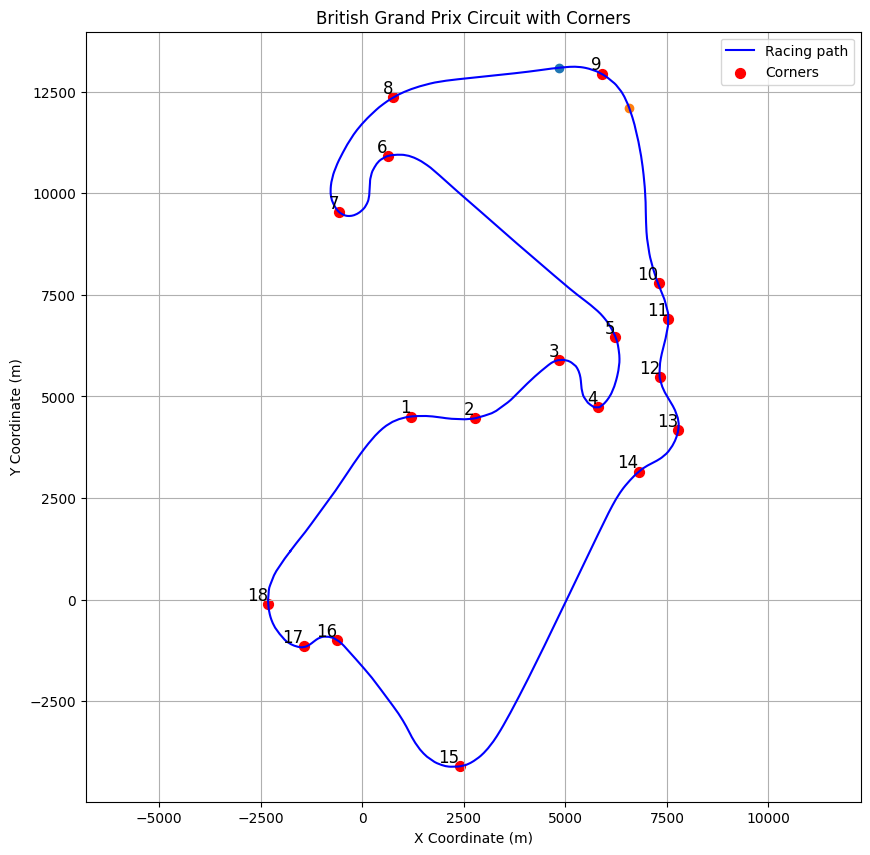

In [47]:
from pathlib import Path
import json

# Base path (already inside F1_friction)
race_data_path = Path("RaceData")

# Store data as { "Driver": { lap_number: data_dict } }
race_data = {}

# Loop over each driver directory
for driver_dir in race_data_path.iterdir():
    if driver_dir.is_dir():
        driver_name = driver_dir.name
        race_data[driver_name] = {}

        # Only include laps 49 to 52
        for lap in range(49, 53):
            json_file = driver_dir / f"{lap}_tel.json"
            if json_file.exists():
                with open(json_file, "r") as f:
                    try:
                        race_data[driver_name][lap] = json.load(f)
                    except json.JSONDecodeError as e:
                        print(f"Failed to load {json_file}: {e}")
print(race_data["VER"])
print(race_data["VER"][49]["tel"].keys())

full_racer_data = {}

for racer in race_data:
    full_racer_data[racer] = {}

    for lap in range(49, 53):
        full_racer_data[racer][lap] = {}
        try:
            for key in race_data[racer][lap]["tel"].keys():
                full_racer_data[racer][lap][key] = race_data[racer][lap]["tel"][key]
        except KeyError as e:
            #delete racer if lap not found
            print(f"Lap {lap} not found for {racer}, deleting racer")
            del full_racer_data[racer]
            break

plt.figure(figsize=(10, 10))
plt.plot(full_racer_data['VER'][49]["x"], full_racer_data['VER'][49]["y"], label='Racing path', color='blue')
plt.scatter(corners["X"], corners["Y"], c='red', label='Corners', s=50)
for i in range(len(corners["CornerNumber"])):
    plt.annotate(corners["CornerNumber"][i], (corners["X"][i], corners["Y"][i]), fontsize=12, ha='right', va='bottom')

plt.scatter(4836.0, 13089.0)
plt.scatter(6572.0, 12106.0)
plt.legend()
plt.title("British Grand Prix Circuit with Corners")
plt.xlabel("X Coordinate (m)")
plt.ylabel("Y Coordinate (m)")
plt.grid()
plt.axis('equal')
plt.show()





In [48]:
idxs = np.where(np.array(full_racer_data["VER"][49]["y"]) < -3100)[0]  # Find indices where y coordinate is less than -3100
corner_start = idxs[0]  # Start of the corner
corner_end = idxs[-1]  # End of the corner

distance = full_racer_data["VER"][49]["distance"][corner_end] - full_racer_data["VER"][49]["distance"][corner_start]
print(f"Distance of the corner: {distance} m")
print("Start of turn",full_racer_data["VER"][49]["distance"][corner_start])
print("End of turn",full_racer_data["VER"][49]["distance"][corner_end] )

#Find coordinates of start and end
start_x = full_racer_data["VER"][49]["x"][corner_start]
start_y = full_racer_data["VER"][49]["y"][corner_start]
end_x = full_racer_data["VER"][49]["x"][corner_end]
end_y = full_racer_data["VER"][49]["y"][corner_end]
print(f"Start coordinates: ({start_x}, {start_y})")
print(f"End coordinates: ({end_x}, {end_y})")


velocities = np.array(full_racer_data["VER"][49]["speed"])
corner_velocities = velocities[corner_start:corner_end+1]
average_velocity = np.mean(corner_velocities)
print("Velocity at the start of the corner:", corner_velocities[0])
print("Velocity at the end of the corner:", corner_velocities[-1])
print("Average velocity during the corner:", average_velocity)

print(corner_start, corner_end)

Distance of the corner: 310.98318296514117 m
Start of turn 4840.210428145971
End of turn 5151.193611111112
Start coordinates: (3406.0, -3214.0)
End coordinates: (1087.2208418169137, -3123.9094299498183)
Velocity at the start of the corner: 314.56112700967986
Velocity at the end of the corner: 249.0
Average velocity during the corner: 248.98890347835396
554 586


In [49]:
turn9 = np.where(abs(np.array(data['VER']["49"]["distance"]) - corners["Distance"][8]) < 3)[0][0]
print("Turn 9 start mid:", turn9)


ex = 2
start6 = full_racer_data["VER"][49]["x"][turn9-ex], full_racer_data["VER"][49]["y"][turn9-ex]
end6 = full_racer_data["VER"][49]["x"][turn9+ex], full_racer_data["VER"][49]["y"][turn9+ex]
print("Start of turn 6:", start6)
print("End of turn 6:", end6)

d0 = np.array(full_racer_data["VER"][49]["distance"])[turn9-ex]
d1 = np.array(full_racer_data["VER"][49]["distance"])[turn9+ex]
distance9 = d1 - d0 
print("Distance of turn 9:", distance9)

r9 = distance9/(np.pi )
print("Radius of the corner:", r9)

velocities9 = np.array(full_racer_data["VER"][49]["speed"])[turn9] / 3.6
average_velocity9 = np.mean(velocities9)
print("Average velocity during turn 9:", average_velocity9)
start_of_corner_15 = 4840
end_of_corner_15 = 5150
r15 = (end_of_corner_15 - start_of_corner_15) / np.pi
print("Radius of corner 15:", r15)
velocities15 = np.array(full_racer_data["VER"][49]["speed"])[corner_start:corner_end+1] / 3.6
average_velocity15 = np.mean(velocities15)
print("Average velocity during corner 15:", average_velocity15)

Turn 9 start mid: 377
Start of turn 6: (5761.734458333831, 13005.353090279843)
End of turn 6: (6032.0, 12853.0)
Distance of turn 9: 31.08319978006648
Radius of the corner: 9.894089784220988
Average velocity during turn 9: 74.72222222222221
Radius of corner 15: 98.6760647169751
Average velocity during corner 15: 69.16358429954275


In [50]:
C_D = (r9/average_velocity9**2 - r15/average_velocity15**2)*9.81*800 / (r15 - r9)
print("Coefficient of drag:", C_D)
print(r9/average_velocity9**2 , r15/average_velocity15**2, 9.81*800/(r15 - r9))

Coefficient of drag: -1.6667953063644265
0.0017720512928719066 0.020627986449303956 88.39632150494838


In [51]:
for i in range(50):
    ex = i
    start6 = full_racer_data["VER"][49]["x"][turn9-ex], full_racer_data["VER"][49]["y"][turn9-ex]
    end6 = full_racer_data["VER"][49]["x"][turn9+ex], full_racer_data["VER"][49]["y"][turn9+ex]
    # print("Start of turn 6:", start6)
    # print("End of turn 6:", end6)

    d0 = np.array(full_racer_data["VER"][49]["distance"])[turn9-ex]
    d1 = np.array(full_racer_data["VER"][49]["distance"])[turn9+ex]
    distance9 = d1 - d0 
    # print("Distance of turn 9:", distance9)

    r9 = distance9/(np.pi *1.25)
    # print("Radius of the corner:", r9)

    velocities9 = np.array(full_racer_data["VER"][49]["speed"])[turn9] / 3.6
    average_velocity9 = np.mean(velocities9)
    # print("Average velocity during turn 9:", average_velocity9)
    start_of_corner_15 = 4840
    end_of_corner_15 = 5150
    r15 = (end_of_corner_15 - start_of_corner_15) / np.pi
    # print("Radius of corner 15:", r15)
    velocities15 = np.array(full_racer_data["VER"][49]["speed"])[corner_start:corner_end+1] / 3.6
    average_velocity15 = np.mean(velocities15)
    # print("Average velocity during corner 15:", average_velocity15)
    C_D = (r9/average_velocity9**2 - r15/average_velocity15**2)*9.81*800 / (r15 - r9)
    print(f"{i}","Coefficient of drag:", C_D)
    # print(r9/average_velocity9**2 , r15/average_velocity15**2, 9.81*800/(r15 - r9))

0 Coefficient of drag: -1.6406049239850564
1 Coefficient of drag: -1.6520118127167298
2 Coefficient of drag: -1.661100415907106
3 Coefficient of drag: -1.6916054566957495
4 Coefficient of drag: -1.7030037117893404
5 Coefficient of drag: -1.7154765843202369
6 Coefficient of drag: -1.7438532562342106
7 Coefficient of drag: -1.7688546176006814
8 Coefficient of drag: -1.8097791021515273
9 Coefficient of drag: -1.858534176768782
10 Coefficient of drag: -1.8966722042714217
11 Coefficient of drag: -1.9476155609427863
12 Coefficient of drag: -1.9921564423580769
13 Coefficient of drag: -2.102512606302082
14 Coefficient of drag: -2.340180285284295
15 Coefficient of drag: -2.798024673617086
16 Coefficient of drag: -3.191795180166134
17 Coefficient of drag: -5.479956823462047
18 Coefficient of drag: -43.945438338013474
19 Coefficient of drag: 12.895053509051785
20 Coefficient of drag: 3.2383779026183563
21 Coefficient of drag: 0.6202097914602852
22 Coefficient of drag: 0.13774144880289144
23 Coeff

In [52]:
#read data.json
import json
with open('data.json', 'r') as f:
    data = json.load(f)


# delete data['Racer']["lapnumber"]["speed"]
for racer in data.keys():
    for lap in data[racer].keys():
        if "speed" in data[racer][lap]:
            del data[racer][lap]["speed"]

import numpy as np
#Convert the data to a numpy array
for racer in data.keys():
    for lap in data[racer].keys():
        for key in data[racer][lap].keys():
            data[racer][lap][key] = np.array(data[racer][lap][key])

import pickle
with open('Racing_data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [84]:
from pathlib import Path
import json

# Base path (already inside F1_friction)
race_data_path = Path("RaceData")

# Store data as { "Driver": { lap_number: data_dict } }
race_data = {}

start_range = 48
# Loop over each driver directory
for driver_dir in race_data_path.iterdir():
    if driver_dir.is_dir():
        driver_name = driver_dir.name
        race_data[driver_name] = {}

        # Only include laps 49 to 52
        for lap in range(start_range,53):
            json_file = driver_dir / f"{lap}_tel.json"
            if json_file.exists():
                with open(json_file, "r") as f:
                    try:
                        race_data[driver_name][lap] = json.load(f)
                    except json.JSONDecodeError as e:
                        print(f"Failed to load {json_file}: {e}")


In [85]:
print(race_data["VER"])
print(race_data["VER"][49]["tel"].keys())

data = {}

for racer in race_data:
    data[racer] = {}

    for lap in range(start_range,53):
        data[racer][lap] = {}
        try:
            for key in race_data[racer][lap]["tel"].keys():
                data[racer][lap][key] = race_data[racer][lap]["tel"][key]
        except KeyError as e:
            #delete racer if lap not found
            print(f"Lap {lap} not found for {racer}, deleting racer")
            del data[racer]
            break
    

print(data["VER"].keys())

necessary_keys = [
    "time",
    "speed",
    "distance"
]


for racer in data:
    for lap in data[racer]:
        for key in list(data[racer][lap].keys()):
            if key not in necessary_keys:
                del data[racer][lap][key]   



{48: {'tel': {'time': [0.0, 0.021, 0.076, 0.181, 0.356, 0.501, 0.536, 0.701, 0.735, 0.836, 0.981, 1.076, 1.301, 1.396, 1.541, 1.656, 1.741, 1.901, 1.976, 2.101, 2.261, 2.356, 2.46, 2.74, 2.816, 3.02, 3.135, 3.22, 3.255, 3.535, 3.58, 3.756, 4.02, 4.056, 4.181, 4.295, 4.381, 4.621, 4.675, 4.821, 4.936, 5.136, 5.476, 5.555, 5.776, 6.061, 6.095, 6.341, 6.435, 6.621, 6.756, 6.941, 6.955, 7.156, 7.181, 7.381, 7.535, 7.821, 8.036, 8.101, 8.216, 8.296, 8.381, 8.616, 8.776, 8.821, 8.976, 9.1, 9.136, 9.38, 9.436, 9.595, 9.7, 9.955, 10.06, 10.115, 10.34, 10.375, 10.555, 10.66, 10.755, 11.035, 11.141, 11.215, 11.461, 11.555, 11.741, 11.815, 11.901, 11.976, 12.101, 12.216, 12.261, 12.395, 12.461, 12.736, 12.781, 12.796, 13.021, 13.076, 13.261, 13.296, 13.461, 13.515, 13.741, 13.856, 13.941, 14.075, 14.261, 14.335, 14.501, 14.661, 14.796, 14.861, 15.021, 15.196, 15.261, 15.541, 15.556, 15.716, 15.94, 15.956, 16.156, 16.22, 16.355, 16.42, 16.62, 16.655, 16.78, 16.836, 16.895, 17.1, 17.155, 17.376, 17

In [86]:
def calculate_mu(velocity: float, r: float, g: float) -> float:
    """
    Calculate the friction coefficient (mu) using the formula:
    
    mu = velocity^2 / (g * r)
    
    where:
    
    Parameters
    ----------
    velocity: float
        The average velocity in m/s.
    r: float
        The radius of the turn in meters.
    g: float
        The acceleration due to gravity in m/s^2.
    
    Returns
    -------
    mu: float
        The friction coefficient.
    """
    m = 800
    C_D = 3.52  # Drag coefficient
    
    return m * velocity**2 / (r * ( m * g + C_D * velocity**2 ))

In [87]:
#First create design matrix
lap_numbers = sorted([int(lap) for lap in data["VER"].keys()])
drivers = list(data.keys())

start_of_corner_15 = 4840
end_of_corner_15 = 5150
#find index where distance is 4840 and 5150
r = (end_of_corner_15 - start_of_corner_15) / np.pi
g = 9.81  # Acceleration due to gravity in m/s^2



def start_end_indices(data, racer, lap, start=4840, end=5150):
    
    start_idx = np.where(np.array(data[racer][lap]["distance"]) >= start)[0][0]
    end_idx = np.where(np.array(data[racer][lap]["distance"]) <= end)[0][-1]
    return start_idx, end_idx




X = []
y = []

for lap in lap_numbers:
    mu_array = []
    for driver in drivers:
        # try:
            start, end = start_end_indices(data, driver, lap, start_of_corner_15, end_of_corner_15)
            velocity = np.mean(data[driver][lap]["speed"][start:end]) / 3.6

            mu = calculate_mu(velocity, r, g)
            mu_array.append(mu)
        # except:
        #     print(f"Data for {driver} on lap {lap} is missing or incomplete.")
        #     continue
    
   
    X.append([1, lap])  # Intercept term and lap number
    y.append(np.mean(mu_array))  # Average friction coefficient for the lap

X = np.array(X) #convert to numpy array
y = np.array(y) #convert to numpy array

# Now do the OLS calculation
beta = np.linalg.inv(X.T @ X) @ X.T @ y #calculate the beta coefficients

print("Coefficients (beta):", beta)

Coefficients (beta): [ 1.63174858 -0.00180249]


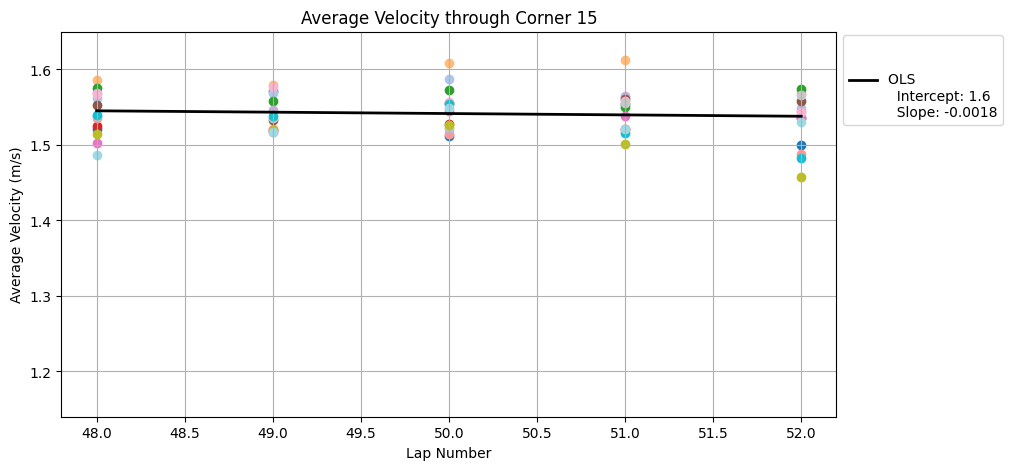

In [90]:
import matplotlib.pyplot as plt
colors = plt.cm.tab20(np.linspace(0, 1, len(data)))

plt.figure(figsize=(10, 5))
for i, driver in enumerate(data):
    color = colors[i]  
    
    for lap in data[driver]:
        start, end = start_end_indices(data, driver, lap, start_of_corner_15, end_of_corner_15)
        velocity = np.mean(data[driver][lap]["speed"][start:end]) / 3.6
        plt.scatter(int(lap), calculate_mu(velocity, r, g), color=color, label=driver if lap == "49" else "")

plt.plot(lap_numbers, beta[0] + beta[1] * np.array(lap_numbers), color='black',label=f'\n\nOLS \n  Intercept: {beta[0]:.2g}\n  Slope: {beta[1]:.2g}', linewidth=2)


plt.xlabel("Lap Number")
plt.ylabel("Average Velocity (m/s)")
plt.title("Average Velocity through Corner 15")
plt.legend(ncol=1, bbox_to_anchor=(1, 1.01))
plt.grid()
plt.ylim(1.14,1.65)
plt.show()

In [17]:
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt

# Base path (already inside F1_friction)
Verstappen_data_path = Path("RaceData/VER")

Racing_data = {}
#save racing data from lap 1 to 52
for lap in range(1, 53):
    json_file = Verstappen_data_path / f"{lap}_tel.json"
    if json_file.exists():
        with open(json_file, "r") as f:
            try:
                Racing_data[lap] = json.load(f)
            except json.JSONDecodeError as e:
                print(f"Failed to load {json_file}: {e}")

In [ ]:
data = {}
for lap in Racing_data.keys():
    data[lap] = {}
    for key in Racing_data[lap]["tel"].keys():
        if key in ["time", "speed", "distance"]:
            data[lap][key] = Racing_data[lap]["tel"][key]

dict_keys(['time', 'rpm', 'speed', 'gear', 'throttle', 'brake', 'drs', 'distance', 'rel_distance', 'acc_x', 'acc_y', 'acc_z', 'x', 'y', 'z', 'dataKey'])


In [15]:
def find_average_velocity(data, lap, start_distance, end_distance):
    """
    Calculate the average velocity between two distances in a given lap.
    
    Parameters
    ----------
    data: dict
        The racing data containing speed and distance information.
    lap: int
        The lap number to analyze.
    start_distance: float
        The starting distance for the calculation.
    end_distance: float
        The ending distance for the calculation.
    
    Returns
    -------
    float
        The average velocity between the specified distances.
    """
    start_idx = np.where(np.array(data[lap]["distance"]) >= start_distance)[0][0]
    end_idx = np.where(np.array(data[lap]["distance"]) <= end_distance)[0][-1]
    
    velocities = np.array(data[lap]["speed"][start_idx:end_idx+1]) / 3.6  # Convert to m/s
    return np.mean(velocities)

In [18]:
start_of_corner_15 = 4840
end_of_corner_15 = 5150

average_velocities = []
for lap in data.keys():
    avg_velocity = find_average_velocity(data, lap, start_of_corner_15, end_of_corner_15)
    average_velocities.append(avg_velocity)



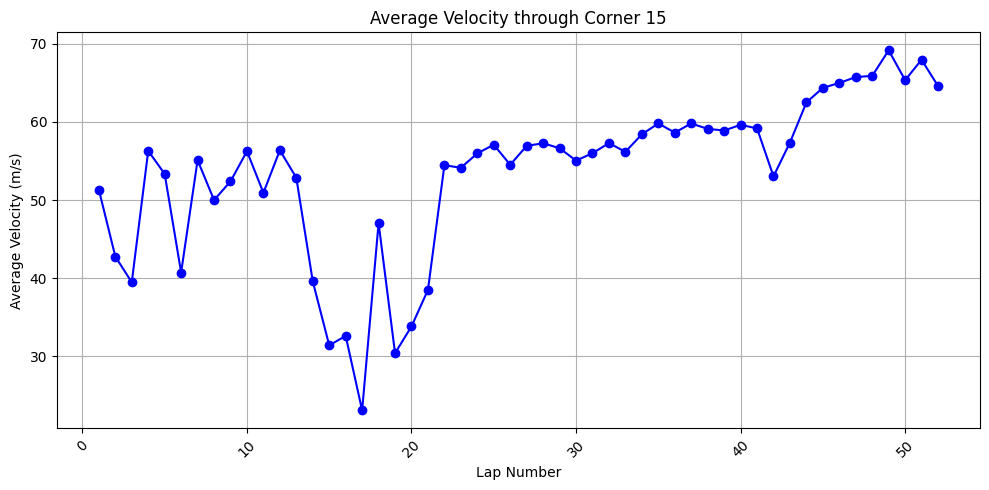

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(list(data.keys()), average_velocities, marker='o', linestyle='-', color='blue')
plt.xlabel("Lap Number")
plt.ylabel("Average Velocity (m/s)")
plt.title("Average Velocity through Corner 15")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt

# Base path (already inside F1_friction)
base_path = Path("RaceData")

needed_keys = ["time", "speed", "distance"]

Racing_data = {}

for driver_dir in base_path.iterdir():
    if driver_dir.is_dir():
        driver_name = driver_dir.name
        Racing_data[driver_name] = {}
        
        for lap in range(1, 53):
            json_file = driver_dir / f"{lap}_tel.json"
            if json_file.exists():
                with open(json_file, "r") as f:
                    try:
                        lap_data = json.load(f)
                        tel = lap_data.get("tel", {})

                        Racing_data[driver_name][lap] = {key: tel[key] for key in needed_keys if key in tel}
                    except json.JSONDecodeError as e:
                        print(f"Failed to load {json_file}: {e}")
            else:
                # fill in missing laps with nan values
                Racing_data[driver_name][lap] = {key: np.nan for key in needed_keys}
                

In [35]:
# find average velocity through corner 15 for each driver
start_of_corner_15 = 4840
end_of_corner_15 = 5150

def find_average_velocity(data, lap, start_distance, end_distance):
    """
    Calculate the average velocity between two distances in a given lap.
    
    Parameters
    ----------
    data: dict
        The racing data containing speed and distance information.
    lap: int
        The lap number to analyze.
    start_distance: float
        The starting distance for the calculation.
    end_distance: float
        The ending distance for the calculation.
    
    Returns
    -------
    float
        The average velocity between the specified distances.
    """
    start_idx = np.where(np.array(data[lap]["distance"]) >= start_distance)[0][0]
    end_idx = np.where(np.array(data[lap]["distance"]) <= end_distance)[0][-1]
    
    velocities = np.array(data[lap]["speed"][start_idx:end_idx+1]) / 3.6  # Convert to m/s
    return np.mean(velocities)


average_velocities = {}
for driver in Racing_data.keys():
    average_velocities[driver] = []
    for lap in Racing_data[driver].keys():
        try: 
            avg_velocity = find_average_velocity(Racing_data[driver], lap, start_of_corner_15, end_of_corner_15)
            average_velocities[driver].append(avg_velocity)
        except Exception as e:
            average_velocities[driver].append(np.nan)

/tmp/ipykernel_3557/4173612531.py:25: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  start_idx = np.where(np.array(data[lap]["distance"]) >= start_distance)[0][0]


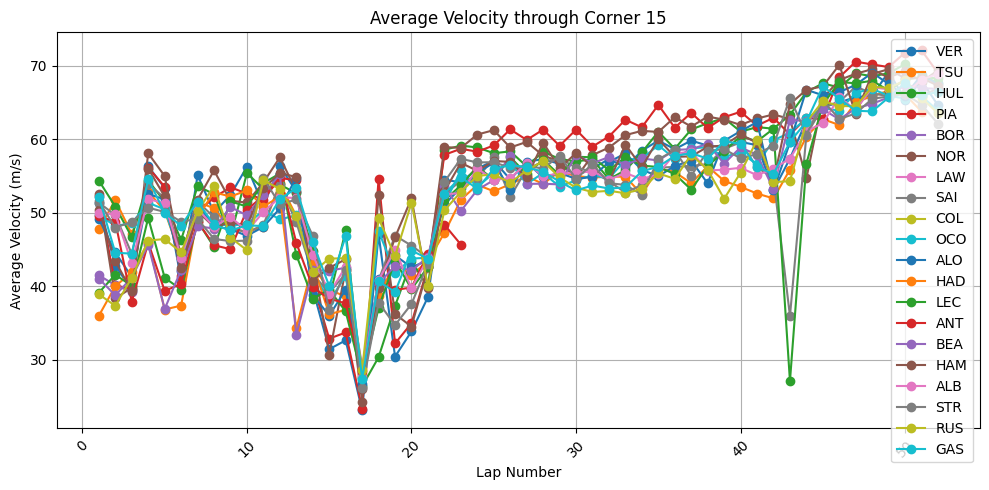

In [36]:

plt.figure(figsize=(10, 5))
for driver, velocities in average_velocities.items():
    plt.plot(list(Racing_data[driver].keys()), velocities, marker='o', linestyle='-', label=driver)

plt.legend()
plt.xlabel("Lap Number")
plt.ylabel("Average Velocity (m/s)")
plt.title("Average Velocity through Corner 15")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


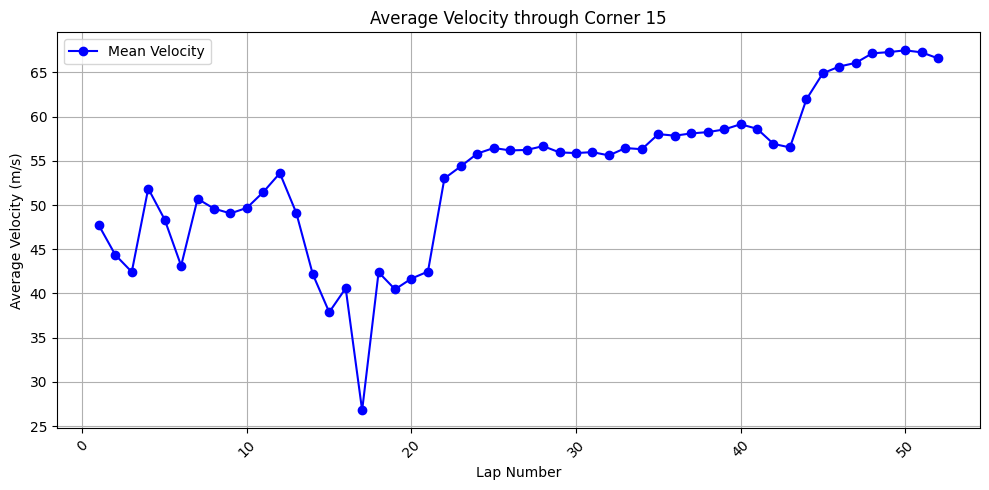

In [37]:
# also plot mean velocity for all drivers
mean_velocities = np.nanmean(np.array(list(average_velocities.values())), axis=0)
plt.figure(figsize=(10, 5))
plt.plot(list(Racing_data["VER"].keys()), mean_velocities, marker='o', linestyle='-', color='blue', label='Mean Velocity')
plt.xlabel("Lap Number")
plt.ylabel("Average Velocity (m/s)")
plt.title("Average Velocity through Corner 15")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
## where did they change tires?
ANT = [2,9,20]
STR = [6,10,41]
HUL = [9,42]
RUS = [10,38]
LEC = [10,42]
HAD = [10]
BEA = [10,41]
PIA = [11,43]
NOR = [11,44]
VER = [11,41]
HAM = [11,41]
GAS = [11,41]
ALO = [11,37]
SAI = [11,41]
TSU = [11]
ALB = [12,42]
OCO = [18,42]
drivers_tire_changes = {
    "ANT": ANT,
    "STR": STR,
    "HUL": HUL,
    "RUS": RUS,
    "LEC": LEC,
    "HAD": HAD,
    "BEA": BEA,
    "PIA": PIA,
    "NOR": NOR,
    "VER": VER,
    "HAM": HAM,
    "GAS": GAS,
    "ALO": ALO,
    "SAI": SAI,
    "TSU": TSU,
    "ALB": ALB,
    "OCO": OCO
}


No tire change data for BOR, skipping.
No tire change data for LAW, skipping.
No tire change data for COL, skipping.


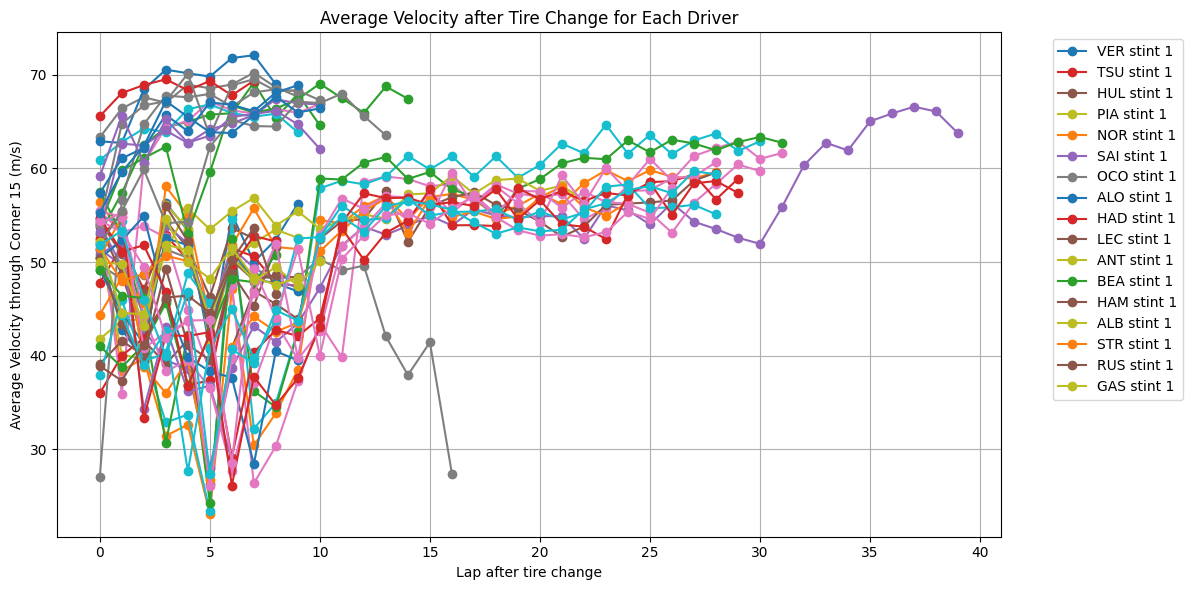

In [40]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for driver, velocities in average_velocities.items():
    try:
        tire_changes = drivers_tire_changes[driver]
        laps = sorted([int(lap) for lap in Racing_data[driver].keys()])
        segments = [0] + tire_changes + [max(laps)+1]  # add start and end

        for i in range(len(segments)-1):
            start_lap = segments[i]
            end_lap = segments[i+1]
            # Find indices for laps in this segment
            segment_laps = [lap for lap in laps if start_lap < lap < end_lap]
            if not segment_laps:
                continue
            # Get velocities for this segment
            segment_indices = [laps.index(lap) for lap in segment_laps]
            segment_velocities = [velocities[idx] for idx in segment_indices]
            # x-axis: laps since tire change
            x = list(range(len(segment_velocities)))
            plt.plot(x, segment_velocities, marker='o', linestyle='-', label=f"{driver} stint {i+1}" if i==0 else None)
    except KeyError:
        print(f"No tire change data for {driver}, skipping.")
plt.xlabel("Lap after tire change")
plt.ylabel("Average Velocity through Corner 15 (m/s)")
plt.title("Average Velocity after Tire Change for Each Driver")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid()
plt.tight_layout()
plt.show()

/tmp/ipykernel_3557/3482570237.py:34: RuntimeWarning: Mean of empty slice
  mean_velocities_per_lap = np.nanmean(np.array(padded_stints), axis=0)


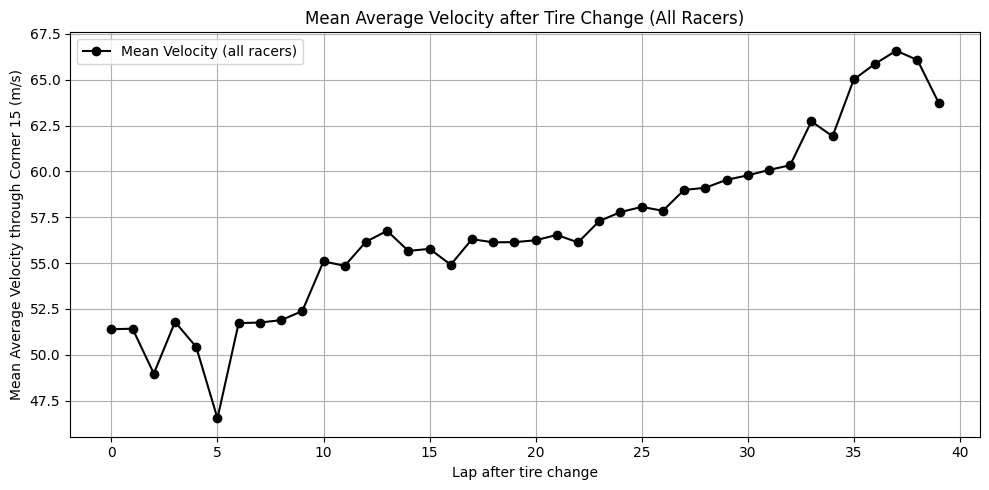

Mean velocities per lap after tire change:
Lap 0: 51.399 m/s
Lap 1: 51.424 m/s
Lap 2: 48.975 m/s
Lap 3: 51.794 m/s
Lap 4: 50.426 m/s
Lap 5: 46.536 m/s
Lap 6: 51.731 m/s
Lap 7: 51.762 m/s
Lap 8: 51.891 m/s
Lap 9: 52.387 m/s
Lap 10: 55.097 m/s
Lap 11: 54.856 m/s
Lap 12: 56.167 m/s
Lap 13: 56.763 m/s
Lap 14: 55.669 m/s
Lap 15: 55.780 m/s
Lap 16: 54.916 m/s
Lap 17: 56.307 m/s
Lap 18: 56.138 m/s
Lap 19: 56.146 m/s
Lap 20: 56.247 m/s
Lap 21: 56.541 m/s
Lap 22: 56.130 m/s
Lap 23: 57.295 m/s
Lap 24: 57.785 m/s
Lap 25: 58.069 m/s
Lap 26: 57.859 m/s
Lap 27: 58.994 m/s
Lap 28: 59.112 m/s
Lap 29: 59.545 m/s
Lap 30: 59.789 m/s
Lap 31: 60.083 m/s
Lap 32: 60.341 m/s
Lap 33: 62.733 m/s
Lap 34: 61.922 m/s
Lap 35: 65.023 m/s
Lap 36: 65.871 m/s
Lap 37: 66.588 m/s
Lap 38: 66.081 m/s
Lap 39: 63.751 m/s
Lap 40: nan m/s
Lap 41: nan m/s


In [41]:
import numpy as np
import matplotlib.pyplot as plt

max_stint_length = 0
all_stint_velocities = []

# Collect all stints for all drivers
for driver, velocities in average_velocities.items():
    try:
        tire_changes = drivers_tire_changes[driver]
        laps = sorted([int(lap) for lap in Racing_data[driver].keys()])
        segments = [0] + tire_changes + [max(laps)+1]

        for i in range(len(segments)-1):
            start_lap = segments[i]
            end_lap = segments[i+1]
            segment_laps = [lap for lap in laps if start_lap < lap < end_lap]
            if not segment_laps:
                continue
            segment_indices = [laps.index(lap) for lap in segment_laps]
            segment_velocities = [velocities[idx] for idx in segment_indices]
            all_stint_velocities.append(segment_velocities)
            max_stint_length = max(max_stint_length, len(segment_velocities))
    except KeyError:
        continue

# Pad stints with np.nan to align lengths
padded_stints = []
for stint in all_stint_velocities:
    padded = stint + [np.nan] * (max_stint_length - len(stint))
    padded_stints.append(padded)

# Compute mean for each lap after tire change, ignoring nan
mean_velocities_per_lap = np.nanmean(np.array(padded_stints), axis=0)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(max_stint_length), mean_velocities_per_lap, marker='o', linestyle='-', color='black', label='Mean Velocity (all racers)')
plt.xlabel("Lap after tire change")
plt.ylabel("Mean Average Velocity through Corner 15 (m/s)")
plt.title("Mean Average Velocity after Tire Change (All Racers)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# List of mean velocities per lap after tire change
print("Mean velocities per lap after tire change:")
for lap_idx, mean_vel in enumerate(mean_velocities_per_lap):
    print(f"Lap {lap_idx}: {mean_vel:.3f} m/s")

In [6]:
from pathlib import Path
import json
import numpy as np

# Base path (already inside F1_friction)
base_path = Path("RaceData")

needed_keys = ["time", "distance"]

Racing_data = {}

for driver_dir in base_path.iterdir():
    if driver_dir.is_dir():
        driver_name = driver_dir.name
        Racing_data[driver_name] = {}
        
        for lap in range(48, 53):
            json_file = driver_dir / f"{lap}_tel.json"
            if json_file.exists():
                with open(json_file, "r") as f:
                    try:
                        lap_data = json.load(f)
                        tel = lap_data.get("tel", {})
                        if lap < 50:
                            Racing_data[driver_name][lap+2] = {key: tel[key] for key in needed_keys if key in tel}
                            print(lap, lap+2)
                        if lap >= 50 and lap < 52:
                            Racing_data[driver_name][lap-2] = {key: tel[key] for key in needed_keys if key in tel}
                            print(lap, lap-2)
                        if lap == 52:
                            Racing_data[driver_name][lap] = {key: tel[key] for key in needed_keys if key in tel}
                            print(lap, lap)

                    except json.JSONDecodeError as e:
                        print(f"Failed to load {json_file}: {e}")
            else:
                # delete racer if lap not found
                print(f"Lap {lap-47} not found for {driver_name}, deleting racer")
                del Racing_data[driver_name]
                break


print(Racing_data.keys())
#save data to a pickle file
import pickle
with open('Racing_Data.pkl', 'wb') as f:
    pickle.dump(Racing_data, f)

48 50
49 51
50 48
51 49
52 52
48 50
49 51
50 48
51 49
Lap 5 not found for TSU, deleting racer
48 50
49 51
50 48
51 49
52 52
48 50
49 51
50 48
51 49
52 52
Lap 1 not found for BOR, deleting racer
48 50
49 51
50 48
51 49
52 52
Lap 1 not found for LAW, deleting racer
48 50
49 51
50 48
51 49
52 52
Lap 1 not found for COL, deleting racer
48 50
49 51
50 48
51 49
52 52
48 50
49 51
50 48
51 49
52 52
Lap 1 not found for HAD, deleting racer
48 50
49 51
50 48
51 49
52 52
Lap 1 not found for ANT, deleting racer
48 50
49 51
50 48
51 49
52 52
48 50
49 51
50 48
51 49
52 52
48 50
49 51
50 48
51 49
52 52
48 50
49 51
50 48
51 49
52 52
48 50
49 51
50 48
51 49
52 52
48 50
49 51
50 48
51 49
52 52
dict_keys(['VER', 'HUL', 'PIA', 'NOR', 'SAI', 'OCO', 'ALO', 'LEC', 'BEA', 'HAM', 'ALB', 'STR', 'RUS', 'GAS'])
